In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import ptitprince as pt
import matplotlib.pyplot as plt


data = pd.read_csv(r"C:\Users\ASUS TUF GAMING\Desktop\SEBA\master\data science\portfolio\TEF Fraud detection\pipeline para generar datos sintéticos TEF\dataset_final1.csv")

print("\n====DATASET OVERVIEW====")
print(f"Dataset shape: {data.shape}")

# display basic data info
print("\n====DATA INFO====")
data.info()

# display summary statistics
print("\n====DATA STATISTICS====")
print(data.describe().T)

# check for missinf values
print("\n====MISSING DATA====")
missing_data = data.isnull().sum()
missing_data_pc = (missing_data / len(data)) * 100
missing_data_summary= pd.DataFrame({"Missing_count": missing_data,
                                    "Missing_percent": missing_data_pc})
print(missing_data_summary[missing_data_summary["Missing_count"] > 0].sort_values("Missing_count", ascending = False))


====DATASET OVERVIEW====
Dataset shape: (94593, 36)

====DATA INFO====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94593 entries, 0 to 94592
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   transaction_id                     94593 non-null  object 
 1   timestamp                          94593 non-null  object 
 2   sender_id                          94593 non-null  object 
 3   receiver_id                        94593 non-null  object 
 4   amount                             94593 non-null  float64
 5   currency                           94593 non-null  object 
 6   transaction_type                   94593 non-null  object 
 7   sender_bank                        94593 non-null  object 
 8   sender_balance_before              94593 non-null  float64
 9   sender_balance_after               94593 non-null  float64
 10  receiver_balance_before            94593 non-n

In [2]:
# Reemplaza los valores faltantes en la columna "receiver_data_id" con "merchant_terminal"
#data["avg_amount_last_7d"].fillna("0.0", inplace=True)
data.fillna({"avg_amount_last_7d": 0}, inplace=True)

In [3]:
# check for missinf values
print("\n====MISSING DATA====")
missing_data = data.isnull().sum()
missing_data_pc = (missing_data / len(data)) * 100
missing_data_summary= pd.DataFrame({"Missing_count": missing_data,
                                    "Missing_percent": missing_data_pc})
print(missing_data_summary[missing_data_summary["Missing_count"] > 0].sort_values("Missing_count", ascending = False))


====MISSING DATA====
Empty DataFrame
Columns: [Missing_count, Missing_percent]
Index: []


In [4]:
data["avg_amount_last_7d"].describe

<bound method NDFrame.describe of 0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
          ...  
94588       0.0
94589    6746.0
94590    5277.5
94591       0.0
94592       0.0
Name: avg_amount_last_7d, Length: 94593, dtype: float64>

In [5]:

print("\n====DATASET OVERVIEW====")
print(f"Dataset shape: {data.shape}")

# display basic data info
print("\n====DATA INFO====")
data.info()

# display summary statistics
print("\n====DATA STATISTICS====")
print(data.describe().T)

# check for missinf values
print("\n====MISSING DATA====")
missing_data = data.isnull().sum()
missing_data_pc = (missing_data / len(data)) * 100
missing_data_summary= pd.DataFrame({"Missing_count": missing_data,
                                    "Missing_percent": missing_data_pc})
print(missing_data_summary[missing_data_summary["Missing_count"] > 0].sort_values("Missing_count", ascending = False))


====DATASET OVERVIEW====
Dataset shape: (94593, 36)

====DATA INFO====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94593 entries, 0 to 94592
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   transaction_id                     94593 non-null  object 
 1   timestamp                          94593 non-null  object 
 2   sender_id                          94593 non-null  object 
 3   receiver_id                        94593 non-null  object 
 4   amount                             94593 non-null  float64
 5   currency                           94593 non-null  object 
 6   transaction_type                   94593 non-null  object 
 7   sender_bank                        94593 non-null  object 
 8   sender_balance_before              94593 non-null  float64
 9   sender_balance_after               94593 non-null  float64
 10  receiver_balance_before            94593 non-n

In [6]:
 ## Analyze the target variable (is_fraud)
print("\n====TARGET VARIABLE ANAYSIS====")
print(f"is_fraud min: {data['is_fraud'].min()}")
print(f"is_fraud max: {data['is_fraud'].max()}")
print(f"is_fraud mean: {data['is_fraud'].mean():.2f}")
print(f"is_fraud median: {data['is_fraud'].median():.2f}")
print(f"is_fraud skewness: {data['is_fraud'].skew():.2f}")
print(f"is_fraud kurtosis: {data['is_fraud'].kurtosis():.2f}")



====TARGET VARIABLE ANAYSIS====
is_fraud min: 0
is_fraud max: 1
is_fraud mean: 0.02
is_fraud median: 0.00
is_fraud skewness: 6.52
is_fraud kurtosis: 40.48


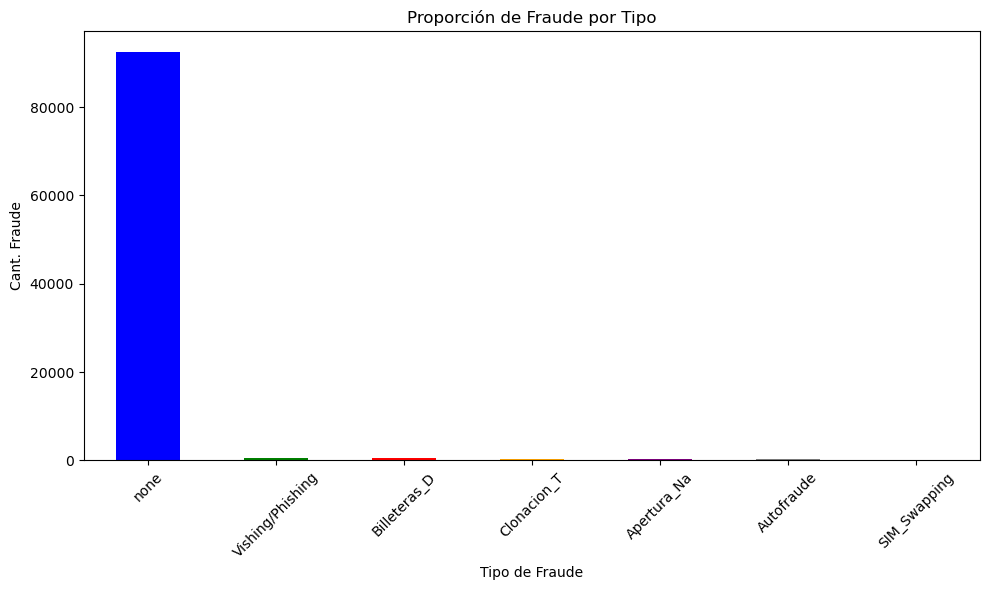

In [7]:
# Assuming you have the dataset loaded in df and it contains a column 'fraud_type'

# Convert the 'fraud_type' column to categorical type (if not already)
data['fraud_type'] = data['fraud_type'].astype('category')

# Group the data by 'fraud_type' and calculate the count of each group
fraud_count = data['fraud_type'].value_counts()

# Create a bar chart to visualize the proportion of each type of fraud
plt.figure(figsize=(10, 6))
fraud_count.plot(kind='bar', color=['blue', 'green', 'red', 'orange', 'purple', 'gray', 'black'])
plt.title('Proporción de Fraude por Tipo')
plt.xlabel('Tipo de Fraude')
plt.ylabel('Cant. Fraude')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# Convert the 'sender_bank' column to categorical type (if not already)
data['sender_bank'] = data['sender_bank'].astype('category')

# Group the data by 'fraud_type' and calculate the count of each group
fraud_count = data['sender_bank'].value_counts()

# Create a bar chart to visualize the proportion of each type of fraud
plt.figure(figsize=(10, 6))
fraud_count.plot(kind='bar', color=['blue', 'green', 'red', 'orange', 'purple', 'gray', 'black'])
plt.title('Proporción de Fraude por Tipo de banco')
plt.xlabel('tipo de banco')
plt.ylabel('Cant. Fraude')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
data['fraud_type'] = data['fraud_type'].astype('category')

# filter the dataset for fraudulent transactions
fraud_transactions = data[data['is_fraud'] == 1]

# filter the dataset for legitimate transactions
legitimate_transactions = data[data['is_fraud'] == 0]

# create a histogram of the amount for both fraudulent and legitimate transactions
plt.figure(figsize=(10, 6))

# histogram for fraudulent transactions
fraud_amount_hist = fraud_transactions['amount'].hist(bins=20, alpha = 0.7, color = 'red', edgecolor= 'black')
fraud_amount_hist.set_title('Distribución de montos fraudulentos')
fraud_amount_hist.set_xlabel('frecuencia')
fraud_amount_hist.set_ylabel('monto')

# histogram for legitimate transactions

legitimate_amount_hist = legitimate_transactions['amount'].hist(bins=20, alpha=0.7, color = 'blue', edgecolor = 'black')
legitimate_amount_hist.set_title('distribución de montos legitimos')
legitimate_amount_hist.set_xlabel('frecuencia')
legitimate_amount_hist.set_ylabel('monto')

# add a legend to the plot
plt.legend(['Fraudulentas', 'Legitimas'])

#display the plot
plt.tight_layout()
plt.show()

In [ ]:
# filter the dataset for legitimate transactions
legitimate_transactions = data[data['is_fraud'] == 0]

# histogram for legitimate transactions

legitimate_amount_hist = legitimate_transactions['amount'].hist(bins=20, alpha=0.7, color = 'blue', edgecolor = 'black')
legitimate_amount_hist.set_title('distribución de montos legitimos')
legitimate_amount_hist.set_xlabel('monto')
legitimate_amount_hist.set_ylabel('frecuencia')

# add a legend to the plot
plt.legend(['Legitimas'])

#display the plot
plt.tight_layout()
plt.show()

In [ ]:
# create a histogram of the amount for both fraudulent and legitimate transactions
plt.figure(figsize=(10, 6))

# histogram for fraudulent transactions
fraud_amount_hist = fraud_transactions['amount'].hist(bins=20, alpha = 0.7, color = 'red', edgecolor= 'black')
fraud_amount_hist.set_title('Distribución de montos fraudulentos')
fraud_amount_hist.set_xlabel('monto')
fraud_amount_hist.set_ylabel('frecuencia')

# add a legend to the plot
plt.legend(['Fraudulentas'])

#display the plot
plt.tight_layout()
plt.show()

In [ ]:
# create a histogram of the amount for both fraudulent and legitimate transactions
plt.figure(figsize=(10, 6))

# histogram for fraudulent transactions
fraud_amount_hist = fraud_transactions['distance_from_home'].hist(bins=20, alpha = 0.7, color = 'red', edgecolor= 'black')
fraud_amount_hist.set_title('Distribución de montos fraudulentos')
fraud_amount_hist.set_xlabel('distancia del hogar')
fraud_amount_hist.set_ylabel('frecuencia')

# add a legend to the plot
plt.legend(['Fraudulentas'])

#display the plot
plt.tight_layout()
plt.show()

In [ ]:
# filter the dataset for legitimate transactions
legitimate_transactions = data[data['is_fraud'] == 0]

# histogram for legitimate transactions

legitimate_amount_hist = legitimate_transactions['distance_from_home'].hist(bins=20, alpha=0.7, color = 'blue', edgecolor = 'black')
legitimate_amount_hist.set_title('distribución de distancias del hogar')
legitimate_amount_hist.set_xlabel('distancia del hogar')
legitimate_amount_hist.set_ylabel('frecuencia')

# add a legend to the plot
plt.legend(['Legitimas'])

#display the plot
plt.tight_layout()
plt.show()

In [ ]:
# create a histogram of the amount for both fraudulent and legitimate transactions
plt.figure(figsize=(10, 6))

# histogram for fraudulent transactions
fraud_amount_hist = fraud_transactions['sender_account_age'].hist(bins=20, alpha = 0.7, color = 'red', edgecolor= 'black')
fraud_amount_hist.set_title('Distribución de antiguedad para montos fraudulentos')
fraud_amount_hist.set_xlabel('antiguedad de la cuenta')
fraud_amount_hist.set_ylabel('frecuencia')

# add a legend to the plot
plt.legend(['Fraudulentas'])

#display the plot
plt.tight_layout()
plt.show()

In [ ]:
# histogram for legitimate transactions

legitimate_amount_hist = legitimate_transactions['sender_account_age'].hist(bins=20, alpha=0.7, color = 'blue', edgecolor = 'black')
legitimate_amount_hist.set_title('distribución de cuentas antiguas para montos legitimos')
legitimate_amount_hist.set_xlabel('antiguedad de la cuenta')
legitimate_amount_hist.set_ylabel('frecuencia')

# add a legend to the plot
plt.legend(['Legitimas'])

#display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Correlation analysis
print("\n===== CORRELATION ANALYSIS =====")
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Find top features correlated with is_fraud
is_fraud_correlation = (correlation_matrix['is_fraud']).sort_values(ascending=False)
print("\nTop 10 features positively correlated with is_fraud:")
print(is_fraud_correlation[1:11])  # Exclude is_fraud itself

print("\nTop 5 features negatively correlated with is_fraud:")
print(is_fraud_correlation.tail(5))

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce', utc=True)
data['timestamp'] = data['timestamp'].dt.tz_convert('America/Santiago').dt.tz_localize(None)


In [ ]:
df = data.sort_values(['sender_id','timestamp'])

In [10]:
data.columns

Index(['transaction_id', 'timestamp', 'sender_id', 'receiver_id', 'amount',
       'currency', 'transaction_type', 'sender_bank', 'sender_balance_before',
       'sender_balance_after', 'receiver_balance_before',
       'receiver_balance_after', 'is_fraud', 'fraud_type',
       'sender_location_lat', 'sender_location_lon', 'receiver_location_lat',
       'receiver_location_lon', 'distance_from_home',
       'time_since_last_transaction', 'sender_device_id', 'receiver_device_id',
       'sender_ip_address', 'receiver_ip_address', 'sender_account_age',
       'sender_avg_daily_transactions', 'sender_avg_daily_amount',
       'sender_recent_account_changes', 'sender_communication_channel_flag',
       'last_24h_count', 'avg_amount_last_7d', 'amount_vs_avg',
       'recent_tx_ratio', 'sender_balance_delta', 'receiver_balance_delta',
       'distance_sender_receiver'],
      dtype='object')

In [ ]:
import numpy as np

df['last_24h_count'] = 0

for sender in df['sender_id'].unique():
    sender_df = df[df['sender_id']==sender]
    times = sender_df['timestamp'].values
    counts = np.zeros(len(times), dtype=int)
    
    # Puntero para la ventana de 24h
    start = 0
    for i in range(len(times)):
        while times[start] < times[i] - np.timedelta64(24, 'h'):
            start += 1
        counts[i] = i - start  # número de transacciones previas en 24h
    
    df.loc[sender_df.index, 'last_24h_count'] = counts

In [ ]:
subset = (
    df[df['sender_id'] == 'USER_001627']
    .sort_values('timestamp')
    [['timestamp', 'last_24h_count']]
)
print(subset.head(20))

In [ ]:
import numpy as np

df['avg_amount_last_7d'] = 0.0

for sender in df['sender_id'].unique():
    sender_df = df[df['sender_id'] == sender]
    times = sender_df['timestamp'].values
    amounts = sender_df['amount'].values
    avg_7d = np.zeros(len(times))
    
    start = 0
    for i in range(len(times)):
        while times[start] < times[i] - np.timedelta64(7, 'D'):
            start += 1
        if i - start > 0:
            avg_7d[i] = amounts[start:i].mean()
        else:
            avg_7d[i] = np.nan  # o 0
    df.loc[sender_df.index, 'avg_amount_last_7d'] = avg_7d


In [ ]:
subset = (
    df[df['sender_id'] == 'USER_001627']
    .sort_values('timestamp')
    [['timestamp', 'avg_amount_last_7d']]
)
print(subset.head(20))

In [ ]:
df['amount_vs_avg'] = df['amount'] - df['sender_avg_daily_amount']

In [ ]:
df['recent_tx_ratio'] = df['last_24h_count'] / df['sender_avg_daily_transactions']

In [ ]:
df.head()

In [ ]:
df['sender_balance_delta'] = df['sender_balance_before'] - df['sender_balance_after']
df['receiver_balance_delta'] = df['receiver_balance_after'] - df['receiver_balance_before']

In [ ]:
from geopy.distance import geodesic

def calc_distance(row):
    return geodesic(
        (row['sender_location_lat'], row['sender_location_lon']),
        (row['receiver_location_lat'], row['receiver_location_lon'])
    ).km

df['distance_sender_receiver'] = df.apply(calc_distance, axis=1)

In [ ]:
df['distance_sender_receiver'].head()

In [12]:
data.shape

(94593, 36)

In [13]:
data['avg_amount_last_7d'].isna().sum()

0

In [14]:
data.to_csv('dataset_final1.csv', index = False)
print('dataset guardado como dataset_final1.csv')

dataset guardado como dataset_final1.csv


In [15]:
data.dtypes

transaction_id                         object
timestamp                              object
sender_id                              object
receiver_id                            object
amount                                float64
currency                               object
transaction_type                       object
sender_bank                            object
sender_balance_before                 float64
sender_balance_after                  float64
receiver_balance_before               float64
receiver_balance_after                float64
is_fraud                                int64
fraud_type                           category
sender_location_lat                   float64
sender_location_lon                   float64
receiver_location_lat                 float64
receiver_location_lon                 float64
distance_from_home                    float64
time_since_last_transaction           float64
sender_device_id                       object
receiver_device_id                